In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key

In [4]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name)

# Set up list to pull in the data
cityname= []
lat= []
lng= []
max_temp = []
humidity = []
cloudiness = []
wind_speed= []
country= []
date= []
count = 0

#Loop through cities to pull out weather data
for city in cities:
    weather_response= requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json= weather_response.json()
    #Set up try/except to skip over the cities that do not have information.
    try:
        cityname.append(weather_json['city']['name'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Done")

Processing record 1 of Set 1 | mahebourg
Processing record 2 of Set 1 | busselton
Processing record 3 of Set 1 | stornoway
Processing record 4 of Set 1 | rikitea
Processing record 5 of Set 1 | katsuura
Processing record 6 of Set 1 | saldanha
Record not found
Processing record 7 of Set 1 | canico
Processing record 8 of Set 1 | arraial do cabo
Processing record 9 of Set 1 | dwarka
Processing record 10 of Set 1 | ratnagiri
Processing record 11 of Set 1 | beihai
Record not found
Processing record 12 of Set 1 | ponta do sol
Processing record 13 of Set 1 | fukue
Processing record 14 of Set 1 | aleksandrovka
Processing record 15 of Set 1 | qaanaaq
Processing record 16 of Set 1 | little current
Processing record 17 of Set 1 | albany
Processing record 18 of Set 1 | east london
Processing record 19 of Set 1 | honningsvag
Processing record 20 of Set 1 | santa cruz
Processing record 21 of Set 1 | mataura
Processing record 22 of Set 1 | nanortalik
Processing record 23 of Set 1 | russkaya polyana
Pr

Processing record 191 of Set 1 | buala
Processing record 192 of Set 1 | praia
Processing record 193 of Set 1 | surgut
Processing record 194 of Set 1 | vilhena
Processing record 195 of Set 1 | victoria
Processing record 196 of Set 1 | tazmalt
Processing record 197 of Set 1 | isiolo
Processing record 198 of Set 1 | beringovskiy
Record not found
Processing record 199 of Set 1 | tilichiki
Processing record 200 of Set 1 | hualmay
Processing record 201 of Set 1 | mehriz
Processing record 202 of Set 1 | paita
Processing record 203 of Set 1 | shellbrook
Processing record 204 of Set 1 | necochea
Processing record 205 of Set 1 | south lake tahoe
Processing record 206 of Set 1 | kuminskiy
Processing record 207 of Set 1 | caravelas
Processing record 208 of Set 1 | bredasdorp
Processing record 209 of Set 1 | medicine hat
Processing record 210 of Set 1 | muzhi
Processing record 211 of Set 1 | dale
Processing record 212 of Set 1 | tena
Processing record 213 of Set 1 | pisco
Processing record 214 of S

Processing record 381 of Set 1 | sao filipe
Processing record 382 of Set 1 | djibo
Processing record 383 of Set 1 | troitskoye
Processing record 384 of Set 1 | santa rosalia
Processing record 385 of Set 1 | grindavik
Processing record 386 of Set 1 | shar
Processing record 387 of Set 1 | camargo
Processing record 388 of Set 1 | tyumentsevo
Record not found
Processing record 389 of Set 1 | bom jesus
Processing record 390 of Set 1 | ena
Processing record 391 of Set 1 | laguna
Processing record 392 of Set 1 | vestmanna
Processing record 393 of Set 1 | gat
Processing record 394 of Set 1 | nuqui
Processing record 395 of Set 1 | manavgat
Record not found
Processing record 396 of Set 1 | puri
Processing record 397 of Set 1 | chita
Record not found
Processing record 398 of Set 1 | ulaanbaatar
Processing record 399 of Set 1 | kaura namoda
Processing record 400 of Set 1 | salalah
Processing record 401 of Set 1 | kawalu
Processing record 402 of Set 1 | taunggyi
Processing record 403 of Set 1 | cha

In [5]:
# Create DataFram
city_data = pd.DataFrame({"City": cityname,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.4081,57.7000,67.39,62,60,24.25,MU,1595527200
1,Busselton,-33.6500,115.3333,52.09,78,5,3.27,AU,1595527200
2,Stornoway,58.2093,-6.3865,58.82,78,88,8.93,GB,1595527200
3,Rikitea,-23.1203,-134.9692,66.99,66,3,18.21,PF,1595527200
4,Katsuura,35.1333,140.3000,72.81,92,100,1.74,JP,1595527200
...,...,...,...,...,...,...,...,...,...
564,Lata,40.1629,-8.3327,79.90,52,0,7.72,PT,1595527200
565,Jidong,45.2167,131.0833,64.11,89,0,1.32,CN,1595527200
566,Kahului,20.8947,-156.4700,78.17,71,12,10.09,US,1595527200
567,Poronaysk,49.2167,143.1167,52.36,88,100,2.19,RU,1595527200


In [6]:
# Save city data into a csv file
city_data.to_csv('city_data.csv')

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

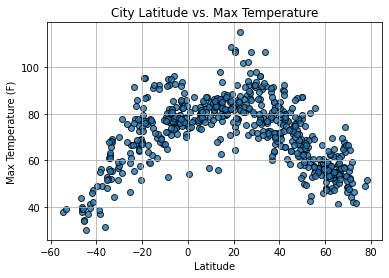

In [7]:
# Plotting the Data
# Temperature (F) vs. Latitude
x_lat = city_data["Lat"]
y_temp= city_data["Max Temp"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

This graph shows the relationship between latitude and the max temperature. As the latitude gets closer to 0, the max temperature increases. 

Text(0.5, 1.0, 'City Latitude vs. Humidity')

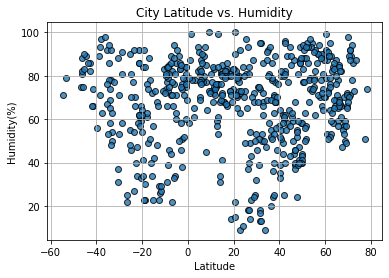

In [8]:
# Humidity (%) vs. Latitude
y_temp= city_data["Humidity"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

The city latitude vs. humidity graph plots the relationship between latitude and humidity. It does not seem like there is a correlation between latitude and humidity

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

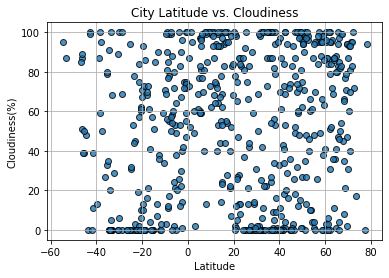

In [9]:
# Cloudiness (%) vs. Latitude
y_temp= city_data["Cloudiness"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

The city latitude vs. cloudiness graph plots the relationship between latitude and cloudiness. Like the humidity graph, it does not seem like there is a correlation between latitude and cloudiness.

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

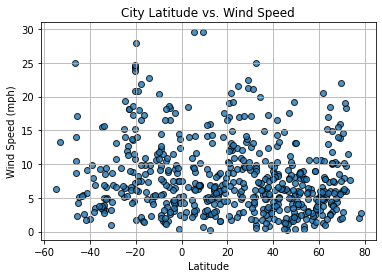

In [10]:
# Wind Speed (mph) vs. Latitude
y_temp= city_data["Wind Speed"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

The city latitude vs. wind speed graph shows the relationship between latitude and wind speed. 

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plt_linear_regression(x_values, y_values, label, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_data.loc[city_data["Lat"] >= 0,:]
southern = city_data.loc[city_data["Lat"] < 0,:]

The r-squared is: -0.7102872582013406


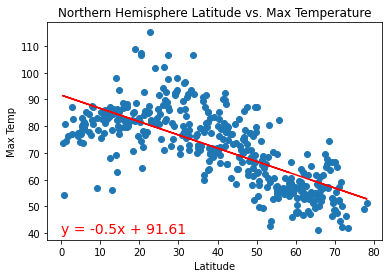

In [21]:
# Northern Hemisphere Latitude vs. Max Temperature
xn_lat = northern["Lat"]
yn_temp = northern["Max Temp"]
plt_linear_regression(xn_lat,yn_temp,'Max Temp',"Northern Hemisphere Latitude vs. Max Temperature" ,(0,40))
plt.show()

There is a strong negative correlation between latitude and max temperature in the norther hemisphere. 

The r-squared is: 0.7926881528923588


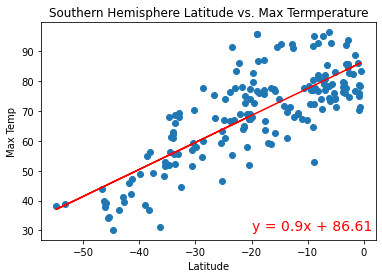

In [22]:
# Southern Hemisphere Latitude vs. Max Termperature
xs_lat = southern["Lat"]
ys_temp = southern["Max Temp"]
plt_linear_regression(xs_lat,ys_temp,'Max Temp', "Southern Hemisphere Latitude vs. Max Termperature",(-20,30))

plt.show()

There is a strong positive correlation between latitude and max temperature in the southern hemisphere. 

The r-squared is: 0.027475531921383776


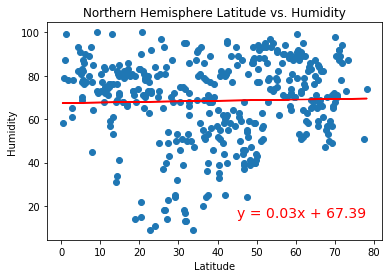

In [23]:
# Northern Hemisphere Latitude vs. Humidity
xn_lat = northern["Lat"]
yn_humid = northern["Humidity"]
plt_linear_regression(xn_lat,yn_humid,'Humidity',"Northern Hemisphere Latitude vs. Humidity",(45,15))

plt.show()

There is a very weak correlation between latitude and humidity in the northern hemisphere. 

The r-squared is: -0.123593146527136


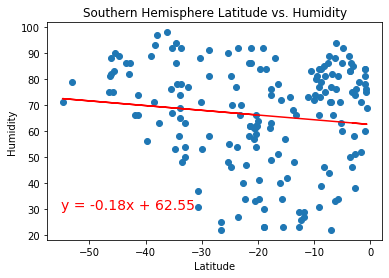

In [16]:
# Southern Hemisphere Latitude vs. Humidity
xs_lat = southern["Lat"]
ys_humid = southern["Humidity"]
plt_linear_regression(xs_lat,ys_humid,'Humidity',"Southern Hemisphere Latitude vs. Humidity",(-55,30))

plt.show()

There is a very weak negative correlation between latitude and humidity in the southern hemisphere.

The r-squared is: -0.027690668559725694


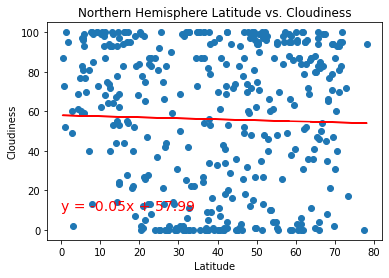

In [17]:
# Northern Hemisphere Latitude vs. Cloudiness
xn_lat = northern["Lat"]
yn_cloud = northern["Cloudiness"]
plt_linear_regression(xn_lat,yn_cloud,'Cloudiness', "Northern Hemisphere Latitude vs. Cloudiness",(0,10))

plt.show()

There is a very weak correlation between latitude and cloudiness in the northern hemisphere.

The r-squared is: 0.06570303495783766


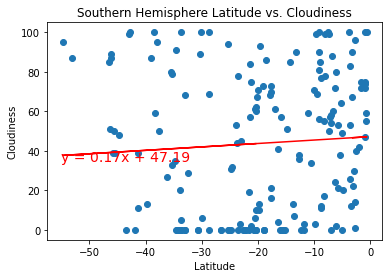

In [18]:
# Southern Hemisphere Latitude vs. Cloudiness
xs_lat = southern["Lat"]
ys_cloud = southern["Cloudiness"]
plt_linear_regression(xs_lat,ys_cloud,'Cloudiness', "Southern Hemisphere Latitude vs. Cloudiness",(-55,35))

plt.show()

There is a very weak positive correlation between latitude and cloudiness in the southern hemisphere.

The r-squared is: -0.08786350421511763


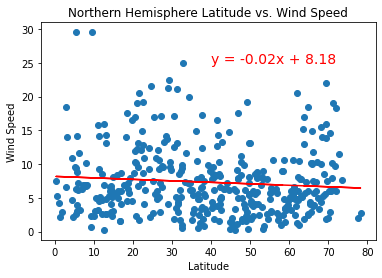

In [19]:
# Northern Hemisphere Latitude vs. Wind Speed
xn_lat = northern["Lat"]
yn_wind = northern["Wind Speed"]
plt_linear_regression(xn_lat,yn_wind,'Wind Speed', "Northern Hemisphere Latitude vs. Wind Speed",(40,25))

plt.show()

There is a very weak correlation between latitude and wind speed in the northern hemisphere.

The r-squared is: 0.021196456766412356


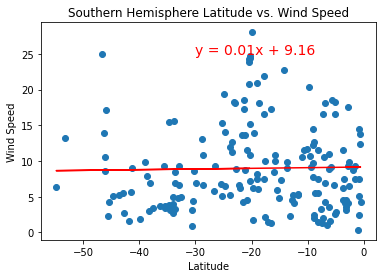

In [20]:
# Southern Hemisphere Latitude vs. Wind Speed
xs_lat = southern["Lat"]
ys_wind = southern["Wind Speed"]
plt_linear_regression(xs_lat,ys_wind,'Wind Speed', "Southern Hemisphere Latitude vs. Wind Speed",(-30,25))

plt.show()

There is a very weak correlation between latitude and wind speed in the southern hemisphere.

Observations

1. When you seperate the data into northern hemisphere and southern hemisphere, you can see the correlation between latitude and max temperature better. 
2. There is a moderate negative correlation between latitude and max temperature for the northen hemisphere. While the southern hemisphere has a strong positive correlation between latitude and max temperature. 
3. There is a weak correlation between latitude and the other variables we compared. The r-squared value for all of these relationships is less than .3.